# Computing Derivatives and Gradients Automatically with TensorFlow
by Gallileu Genesis

Gradients and derivatives are used in many optimizing algorithms, such as Gradient Descent and machine learning algorithms such as backpropagation to form neural networks.

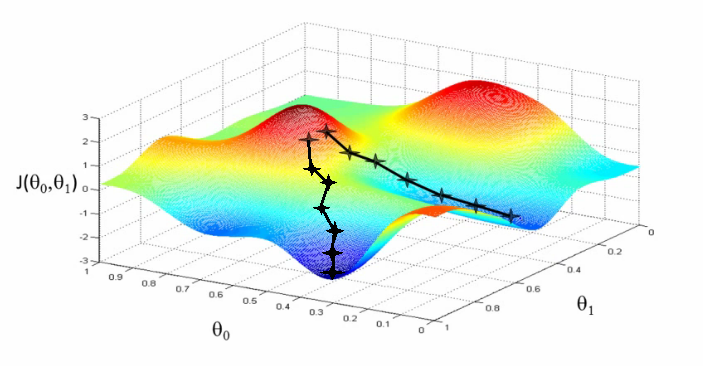

The gradient of a function can be calculated by applying Chain rule.

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$


Let's start with a simple function, as shown below

$$f(x) = x^2+1$$

whose derivative is

$$\frac{df(x)}{dx} = 2x$$

This operation can be done using TensorFlow, as following:

In [220]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [221]:
x = tf.linspace(-5, 5, 100)

# Lets use the GradientTape(), a API for automatic differentiation.
with tf.GradientTape() as tape:
    tape.watch(x)
    fx = x**2+1  #our target function

In [222]:
# df = (x^2+1) * dx
df_dx = tape.gradient(fx, x)

In [223]:
plt.plot(x.numpy(), fx.numpy(), label="$fx = x^2+1$")
plt.plot(x.numpy(), df_dx.numpy(), label=r"$\frac{df}{dx} = 2x$")
plt.legend()
_ = plt.xlabel('x')

Let's try something a little bit more complicated

In [224]:
x = tf.linspace(-5, 5, 100)

with tf.GradientTape() as tape:
    tape.watch(x)
    fx =  5*tf.sin(2*x) + x**2 #our target function 

In [225]:
dfx_dx = tape.gradient(fx, x)

In [226]:
plt.plot(x, fx, label="Function")
plt.plot(x, dfx_dx, label="Derivative")
plt.legend()
_ = plt.xlabel('x')

What if our function depends on two or more variables?

In [227]:
x = tf.Variable(tf.linspace(-1, 1, 100), name='x')
y = tf.Variable(tf.linspace(-1, 1, 100), name='y')

with tf.GradientTape(persistent=True) as tape:
    fxy =  (tf.sin(4*x)-tf.cos(5*y))/5 #our target function 

In [228]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

level_x = np.arange(0, 2, 0.02)
level_y = np.arange(0, 3, 0.02)

X, Y = np.meshgrid(x, y)

Z = (tf.sin(4*X)-tf.cos(5*Y))/5

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(-140, 120)
plt.show()

We can obtain the partial derivatives of the function with respect to each of the variables.

In [229]:
[dfxy_dx, dfxy_dy] = tape.gradient(fxy, [x, y])

In [230]:
plt.plot(x.numpy(), dfxy_dx, label=r"$\frac{dfxy}{dx}$")
plt.plot(y.numpy(), dfxy_dy, label=r"$\frac{dfxy}{dy}$")
plt.legend()

plt.show()

Tensorflow also has some optimization methods implemented such as Stochastic gradient descent (SGD) and rmsprop. 

let's check it out .

In [231]:
x = tf.Variable(0.25) #initial value of x
y = tf.Variable(-0.50) #initial value of y

def fxy():
    return (tf.sin(4*x)-tf.cos(5*y))/5 #our target function 

In [232]:
# Lets call the SGD optmizer to minize the fxy function w.r.t x and y
opt = tf.optimizers.SGD(learning_rate=0.01)
step = opt.minimize(fxy, var_list=[x,y])

Let's draw a trajectory of a gradient descent in 2D

In [233]:
from matplotlib import animation, rc
from IPython.display import HTML, display_html

In [234]:
# nice figure settings
fig, ax = plt.subplots()

level_x = tf.linspace(-1, 1, 100)
level_y = tf.linspace(-1, 1, 100)

X, Y = np.meshgrid(level_x, level_y)

Z = (tf.sin(4*X)-tf.cos(5*Y))/5
 
contour = ax.contour(X, Y, Z, 10)
ax.clabel(contour, inline=1, fontsize=10)
line, = ax.plot([], [], lw=2)

In [235]:
# start animation with empty trajectory
def init():
    line.set_data([], [])
    return (line,)

 
trajectory = [[x.numpy(),y.numpy()]]

# one animation step (make one SGD step)
def animate(i):
    step = opt.minimize(fxy, var_list=[x,y])
    trajectory.append([x.numpy(),y.numpy()])
    line.set_data(*zip(*trajectory))
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=20, blit=True)

In [236]:
try:
    display_html(HTML(anim.to_html5_video()))
except (RuntimeError, KeyError):
    anim.save(None, writer=matplotlib_utils.SimpleMovieWriter(0.001))